# Reference Population: low *vs* high start mutation probability

The parameters are summarized in the table below (**N = Neutral, S = Selection**):

Parameter  |Low q (N/S)|High q(N/S)|
-----------|---------|------------|
Final size | $10^6$  |   $10^6$   |
**q (start)**  |$10^{-6}$| $10^{-2}$  |
q-factor   | $1$   |   $1$    |  
P(death)   | $0.3$   |   $0.3$    |
Selection  | 0 / 0.3 |  0 / 0.3   |  

In [1]:
from ThesisScripts.MyModel import *
from ThesisScripts.Analyses import *
from ThesisScripts.Visualizations import *
from ThesisScripts.PhyloTree import *

from IPython.display import Image

%matplotlib inline
#matplotlib preamble, taken from http://blog.juliusschulz.de/blog/ultimate-ipython-notebook
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 14, 7
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# Simulations

## Low q (Neutral)

In [2]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-6)
q_fac = 1
alpha = 0.3
sel = 0
low_q_N = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
low_q_N.simulate()
print("Total population size:", low_q_N.size)
print("Generations:", low_q_N.gen)
print()
print("Start clone size:", low_q_N.start_clone.size)
print("Number of subclones:", len(low_q_N.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 1668670
Number of subclones: 2


## High q (Neutral)

In [3]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-2)
q_fac = 1
alpha = 0.3
sel = 0
high_q_N = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
high_q_N.simulate()
print("Total population size:", high_q_N.size)
print("Generations:", high_q_N.gen)
print()
print("Start clone size:", high_q_N.start_clone.size)
print("Number of subclones:", len(high_q_N.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 1437064
Number of subclones: 23752


## Low q (Selection)

In [4]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-6)
q_fac = 1
alpha = 0.3
sel = 0.3
low_q_S = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
low_q_S.simulate()
print("Total population size:", low_q_S.size)
print("Generations:", low_q_S.gen)
print()
print("Start clone size:", low_q_S.start_clone.size)
print("Number of subclones:", len(low_q_S.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 1668670
Number of subclones: 4


## High q (Selection)

In [5]:
# set seed to get same result for each test simulation
np.random.seed(123)

# Test cell
l = 10**6
q = 10**(-2)
q_fac = 1
alpha = 0.3
sel = 0.3
high_q_S = Population(l, q, mutfactor=q_fac, death_frac=alpha, selection=sel)
high_q_S.simulate()
print("Total population size:", high_q_S.size)
print("Generations:", high_q_S.gen)
print()
print("Start clone size:", high_q_S.start_clone.size)
print("Number of subclones:", len(high_q_S.clones[1:]))

Total population size: 1668674
Generations: 27

Start clone size: 3470
Number of subclones: 23933


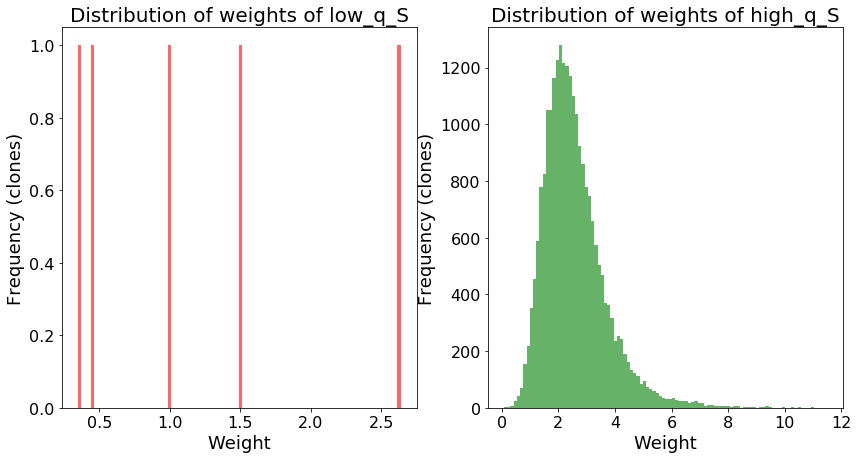

In [6]:
# Check weights of clones for population with selection
low_q_weights = []
for clone in low_q_S.clones:
    low_q_weights.append(clone.weight)

high_q_weights = []
for clone in high_q_S.clones:
    high_q_weights.append(clone.weight)

plt.figure();

plt.subplot(121);
plt.hist(low_q_weights, bins=100, color='r', alpha=0.6);
plt.title("Distribution of weights of low_q_S");
plt.xlabel("Weight");
plt.ylabel("Frequency (clones)");

plt.subplot(122);
plt.hist(high_q_weights, bins=100, color='g', alpha=0.6);
plt.title("Distribution of weights of high_q_S");
plt.xlabel("Weight");
plt.ylabel("Frequency (clones)");

plt.show()

**ALL ANALYSES** are carried out with the detection limit defined below, unless otherwise stated.

In [7]:
detection_limit = 100

## Evolution of clone family sizes for low_q_N and low_q_S

In case of a low starting mutation probability, none of the subclones exceed the detection limit and are therefore not visisble in the clone family size plots unless the detection limit is lowered.

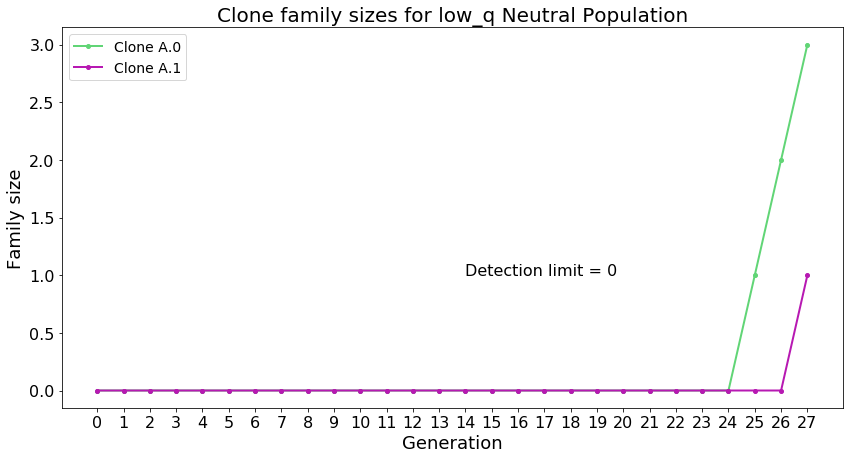

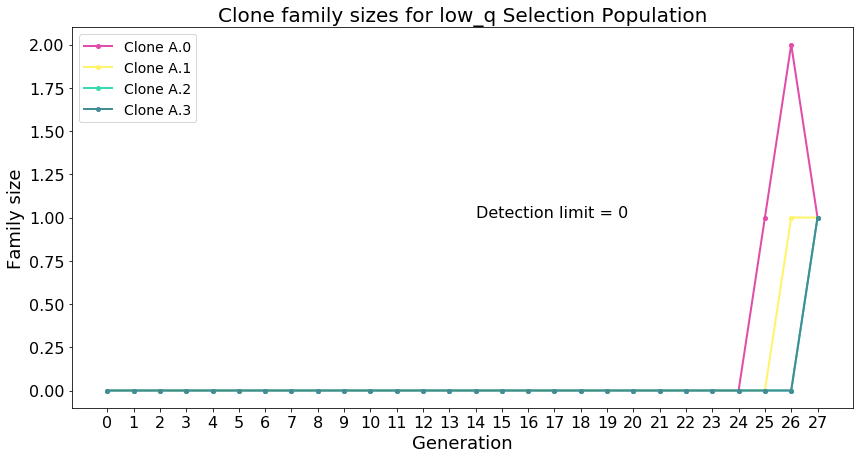

In [8]:
low_q_N_fam_size_plot = family_size_plots(low_q_N, det_lim=0);
plt.title("Clone family sizes for low_q Neutral Population");
plt.yscale('linear');
plt.text(14, 1, "Detection limit = 0");
plt.legend();
plt.savefig("./Figures/Ref-Start_mut_rate/low_q_N-fam_size_evo.png");
plt.show();

low_q_S_fam_size_plot = family_size_plots(low_q_S, det_lim=0);
plt.title("Clone family sizes for low_q Selection Population");
plt.yscale('linear');
plt.text(14, 1, "Detection limit = 0");
plt.legend();
plt.savefig("./Figures/Ref-Start_mut_rate/low_q_S-fam_size_evo.png");
plt.show()

## Evolution of clone family sizes for high_q_N and high_q_S

In case of high starting mutation probability, there is a clear abundance of subclones in the plots. In the Selection case, one subclone seems to dominate the population (green lines).

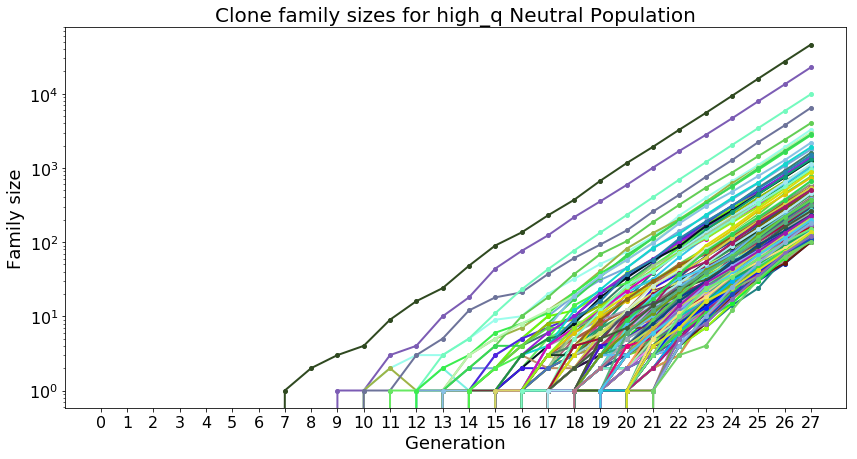

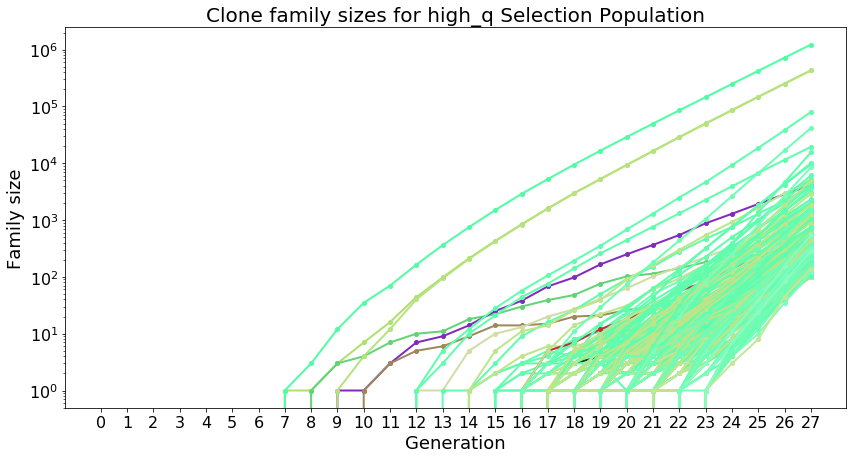

In [9]:
plt.figure()
high_q_N_fam_size_plot = family_size_plots(high_q_N, det_lim=detection_limit)
plt.title("Clone family sizes for high_q Neutral Population")
plt.savefig("./Figures/Ref-Start_mut_rate/high_q_N-fam_size_evo.png")
plt.show()

high_q_S_fam_size_plot = family_size_plots(high_q_S, det_lim=detection_limit)
plt.title("Clone family sizes for high_q Selection Population")
plt.savefig("./Figures/Ref-Start_mut_rate/high_q_S-fam_size_evo.png")
plt.show()

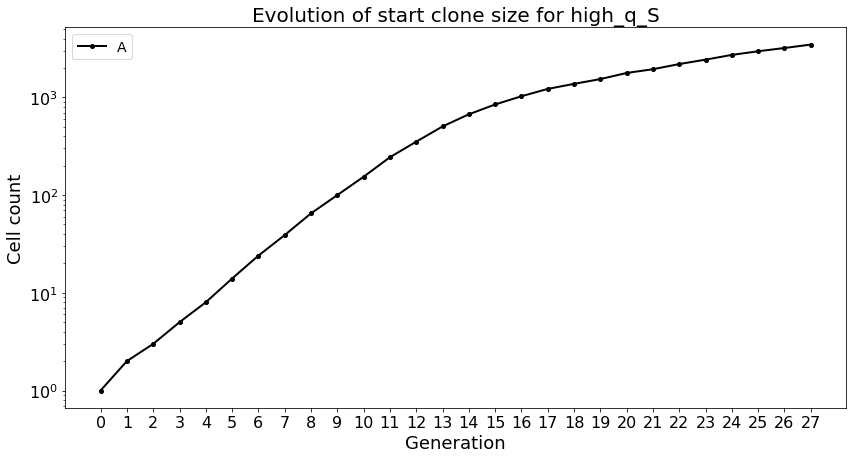

In [10]:
# plotting start clone size evolution for high_q_S
plt.figure()
plt.plot(high_q_S.start_clone.size_vec, marker='.', color='k', label=high_q_S.start_clone.ID);
plt.ylabel("Cell count");
plt.xlabel("Generation");
plt.title("Evolution of start clone size for high_q_S");
plt.legend();
plt.xticks(range(0, high_q_S.gen+1, 1));
plt.yscale('log');
plt.show()

In case of high starting mutation probability (q) AND Selection, we see that the growth rate of the start clone actually decreases and reaches a plateau. This is probably related to the fact that one of the subclonec starts to dominate the population.

## Phylo tree for low_q Populations

Identical trees for Neutral and Selection populations.

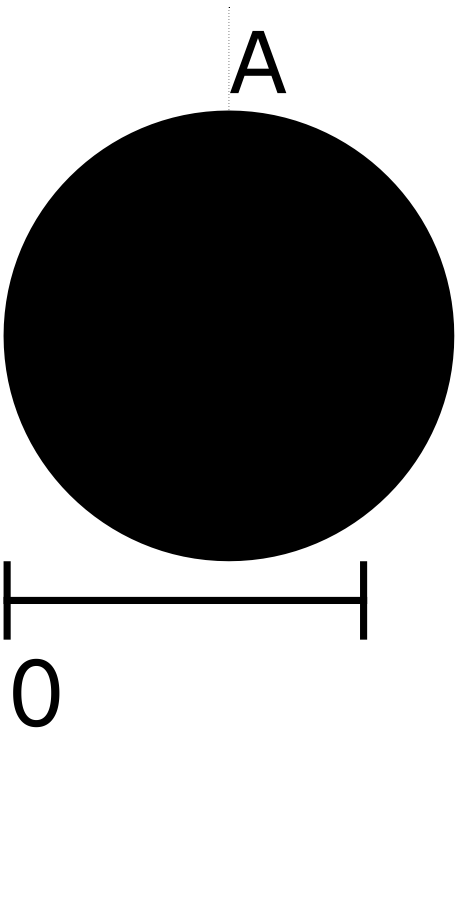

In [11]:
low_q_N_tree, low_q_N_ts = build_tree(low_q_N, det_lim=detection_limit, log=True);
#print(low_q_N_tree)
low_q_N_tree.render("./Figures/Ref-Start_mut_rate/low_q_N-tree.png", tree_style=low_q_N_ts, h=260, units='mm');
Image("./Figures/Ref-Start_mut_rate/low_q_N-tree.png")

## Phylo tree for high_q populations

The detection limit was raised for these graphs to **1000** to improve visibility.

### Neutral

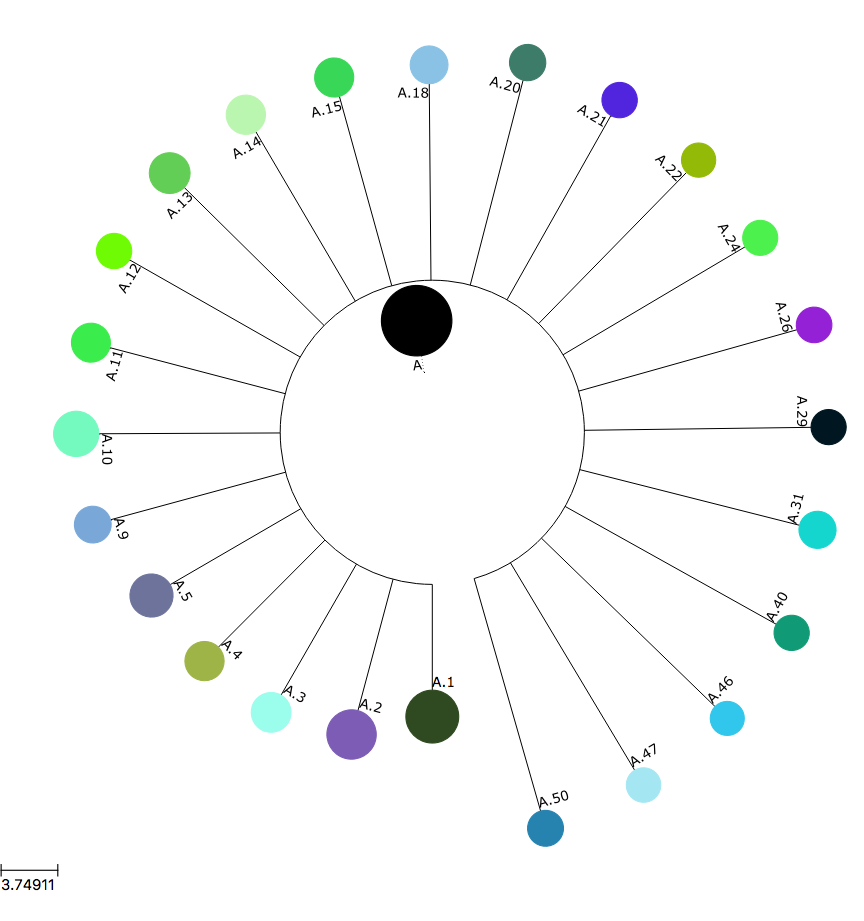

In [12]:
high_q_N_tree, high_q_N_ts = build_tree(high_q_N, det_lim=1000, log=True);
#print(high_q_N_tree)
high_q_N_ts.mode = "c"
high_q_N_tree.render("./Figures/Ref-Start_mut_rate/high_q_N-tree.png", tree_style=high_q_N_ts, h=260, units='mm');
Image("./Figures/Ref-Start_mut_rate/high_q_N-tree.png")

### Selection

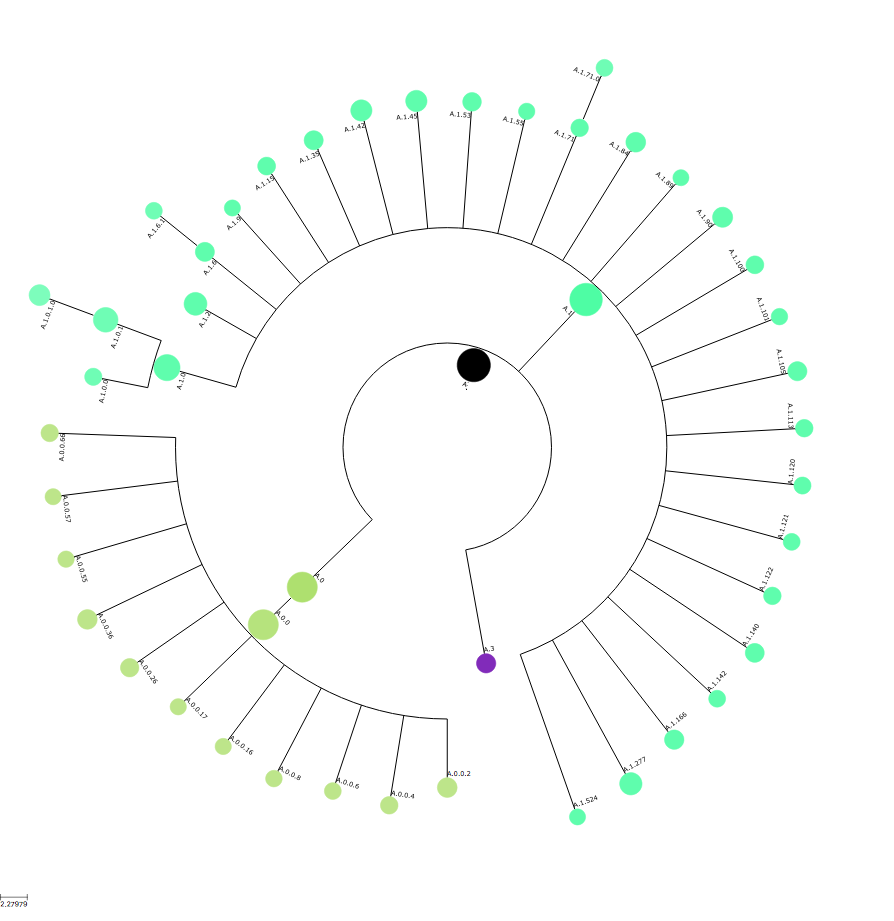

In [13]:
high_q_S_tree, high_q_S_ts = build_tree(high_q_S, det_lim=1000, log=True);
#print(high_q_S_tree)
high_q_S_ts.mode = "c"
high_q_S_tree.render("./Figures/Ref-Start_mut_rate/high_q_S-tree.png", tree_style=high_q_S_ts, h=260, units='mm');
Image("./Figures/Ref-Start_mut_rate/high_q_S-tree.png")

## Allele frequency spectrum for low_q Populations

Again, identical graphs for Neutral and Selection population.

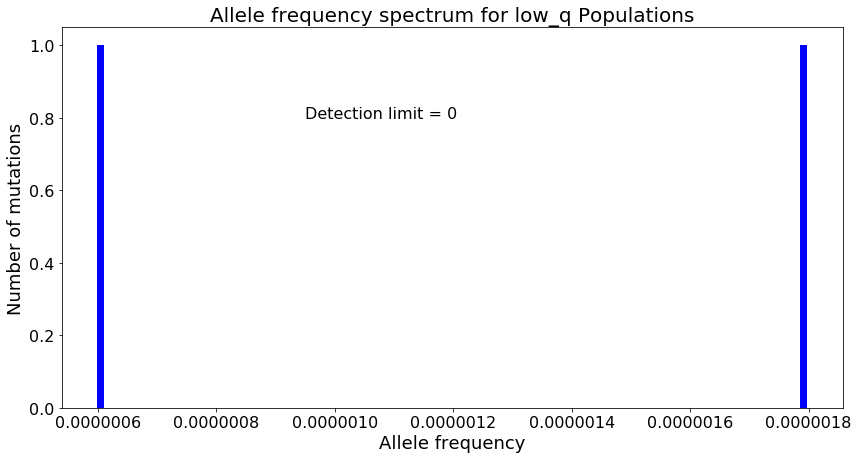

In [14]:
lim = 0
low_q_N_af = allele_freq_spectrum(low_q_N, det_lim=lim)
low_q_N_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for low_q Populations');
plt.text(0.00000095, 0.8, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Start_mut_rate/low_q_N-AF_spec.png")
plt.show()

## Allele frequency spectrum for high_q Populations

### Neutral

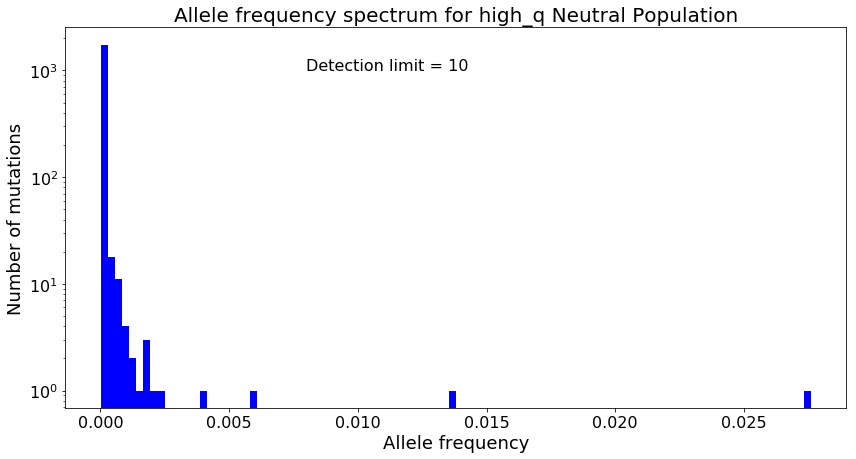

In [15]:
lim = 10
high_q_N_af = allele_freq_spectrum(high_q_N, det_lim=lim)
high_q_N_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='b');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for high_q Neutral Population');
plt.yscale('log');
plt.text(0.008, 10**3, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Start_mut_rate/high_q_N-AF_spec.png")
plt.show()

### Selection

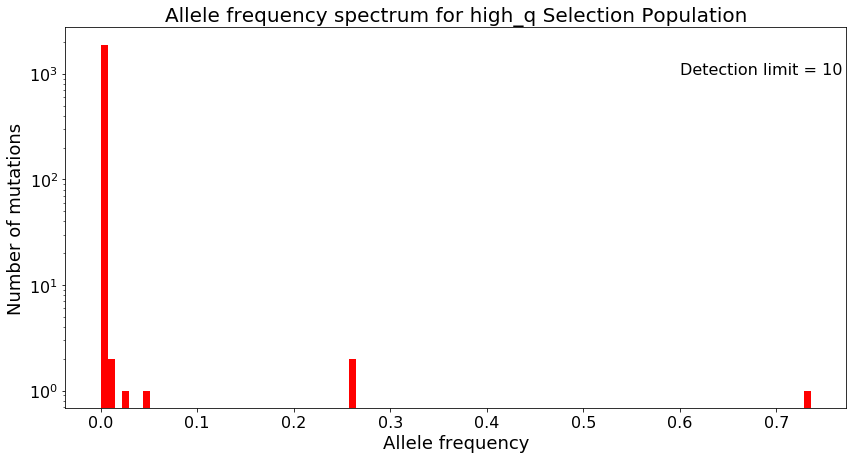

In [16]:
lim = 10
high_q_S_af = allele_freq_spectrum(high_q_S, det_lim=lim)
high_q_S_af.iloc[1:].plot(kind='hist', grid=False, logy=False, bins=100, color='r');
plt.ylabel('Number of mutations');
plt.xlabel('Allele frequency');
plt.title('Allele frequency spectrum for high_q Selection Population');
plt.yscale('log');
plt.text(0.6, 10**3, "Detection limit = %s" %(lim));
plt.savefig("./Figures/Ref-Start_mut_rate/high_q_S-AF_spec.png");
plt.show()

## Cumulative number of mutations in function of 1/f

### Low q


R^2 = 1.0


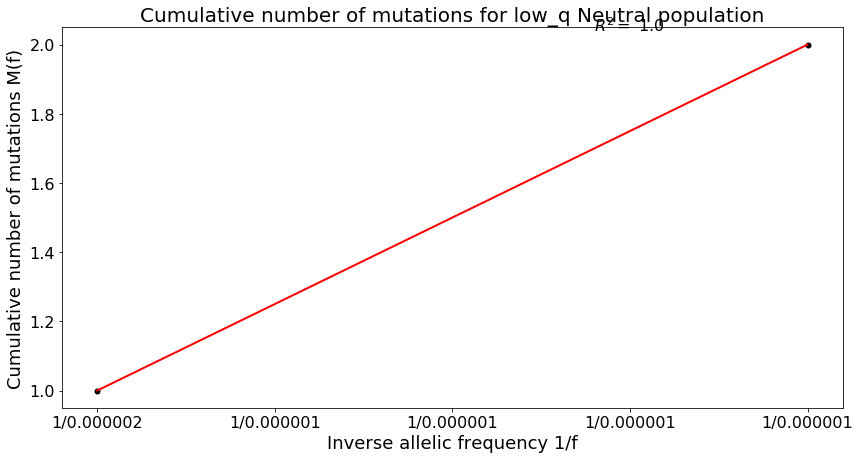

In [17]:
fit_low_q_N_af_raw, fit_low_q_N_af_r_value, fit_low_q_N_fig = fit_cumulative_mutations(low_q_N_af)
print("\nR^2 =", fit_low_q_N_af_r_value)
plt.title("Cumulative number of mutations for low_q Neutral population");
plt.savefig("./Figures/Ref-Start_mut_rate/low_q_N-Cum_num_M.png");
plt.show()

### High q populations


R^2 = 0.999824961104


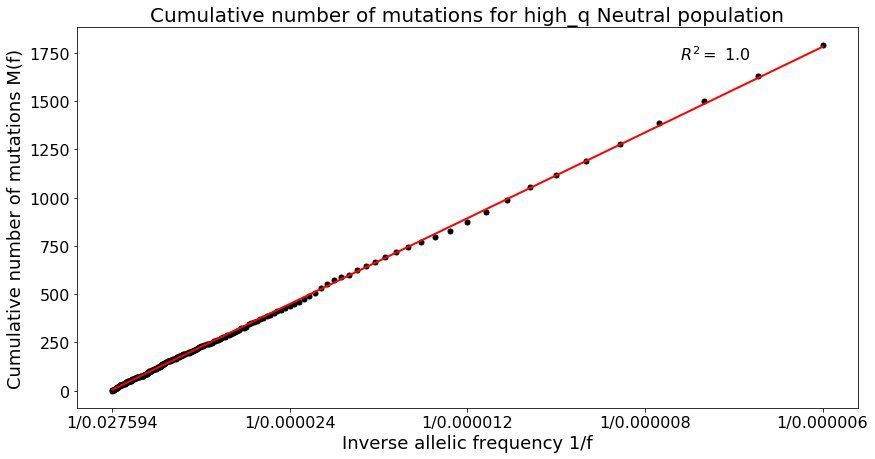


R^2 = 0.997435341521


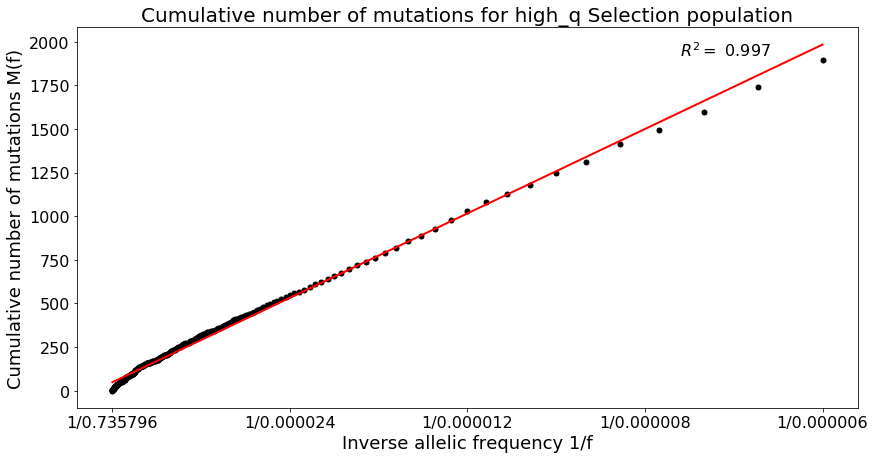

In [18]:
fit_high_q_N_af_raw, fit_high_q_N_af_r_value, fit_high_q_N_fig = fit_cumulative_mutations(high_q_N_af)
print("\nR^2 =", fit_high_q_N_af_r_value)
plt.title("Cumulative number of mutations for high_q Neutral population");
plt.savefig("./Figures/Ref-Start_mut_rate/high_q_N-Cum_num_M.png");
plt.show()

fit_high_q_S_af_raw, fit_high_q_S_af_r_value, fit_high_q_S_fig = fit_cumulative_mutations(high_q_S_af)
print("\nR^2 =", fit_high_q_S_af_r_value)
plt.title("Cumulative number of mutations for high_q Selection population");
plt.savefig("./Figures/Ref-Start_mut_rate/high_q_S-Cum_num_M.png");
plt.show()

## Distribution of number of mutations for low_q Populations

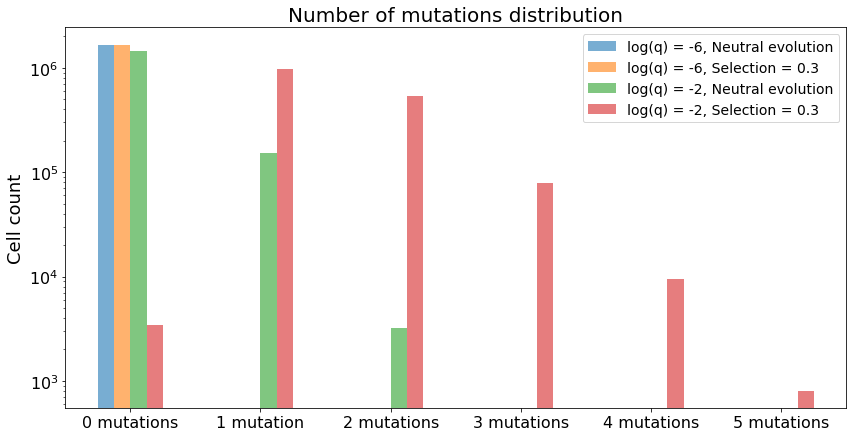

In [19]:
low_q_N_num_mut_df = num_mutations_distribution(low_q_N, det_lim=detection_limit)
low_q_N_num_mut_df.columns = ["log(q) = -6, Neutral evolution"]
#low_q_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

low_q_S_num_mut_df = num_mutations_distribution(low_q_S, det_lim=detection_limit)
low_q_S_num_mut_df.columns = ["log(q) = -6, Selection = %s" %(sel)]
#low_q_Snum_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='r', alpha=0.6);

high_q_N_num_mut_df = num_mutations_distribution(high_q_N, det_lim=detection_limit)
high_q_N_num_mut_df.columns = ["log(q) = -2, Neutral evolution"]
#low_q_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

high_q_S_num_mut_df = num_mutations_distribution(high_q_S, det_lim=detection_limit)
high_q_S_num_mut_df.columns = ["log(q) = -2, Selection = %s" %(sel)]
#low_q_N_num_mut_df.plot(kind='bar', logy=True, legend=True, rot=0, color='b', alpha=0.6);

combo_low = low_q_N_num_mut_df.join(low_q_S_num_mut_df, how='right')
combo_high = high_q_N_num_mut_df.join(high_q_S_num_mut_df, how='right')
combo = combo_low.join(combo_high, how='right')

combo.plot(kind='bar', logy=True, legend=True, rot=0, alpha=0.6, );
plt.ylabel("Cell count");
plt.title("Number of mutations distribution");
plt.savefig("./Figures/Ref-Start_mut_rate/Start_mut_rate-Num_mut.png")